# 메인 팀플 퀘스트

### 고려해 볼 포인트
* 테이스터에 따라 평균이 다를까? (null 값이 많음)

### 환경 설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# 경고창이 뜨지 않도록 해주는 코드
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

In [2]:
# for Jupyter notebook # 한글폰트 설치
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')

### 데이터프레임 분석

In [3]:
wine = pd.read_csv('train.csv')

In [4]:
wine.shape

(103976, 13)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103976 entries, 0 to 103975
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                103925 non-null  object 
 1   description            103976 non-null  object 
 2   designation            73967 non-null   object 
 3   price                  96781 non-null   float64
 4   province               103925 non-null  object 
 5   region_1               86954 non-null   object 
 6   region_2               40408 non-null   object 
 7   taster_name            83005 non-null   object 
 8   taster_twitter_handle  78994 non-null   object 
 9   title                  103976 non-null  object 
 10  variety                103975 non-null  object 
 11  winery                 103976 non-null  object 
 12  points                 103976 non-null  int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 10.3+ MB


In [6]:
wine.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,103925,43,US,43578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,103976,97550,This zesty red has pretty aromas that suggest ...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,73967,32961,Reserve,1634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,96781,NaN,NaN,NaN,35.4374,42.4254,4,17,25,42,3300
province,103925,407,California,28941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,86954,1188,Napa Valley,3599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,40408,17,Central Coast,8910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,83005,19,Roger Voss,20536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_twitter_handle,78994,15,@vossroger,20536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,103976,96761,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# 결측치 개수 파악
wine.isnull().sum().to_frame('nan_count') 

,nan_count
country,51
description,0
designation,30009
price,7195
province,51
region_1,17022
region_2,63568
taster_name,20971
taster_twitter_handle,24982
title,0


In [8]:
# 결측치 비율 파악
pd.DataFrame(data=wine.isnull().sum()/len(wine)*100, columns=['nan_ratio'])

,nan_ratio
country,0.049050
description,0.000000
designation,28.861468
price,6.919866
province,0.049050
region_1,16.371086
region_2,61.137186
taster_name,20.169077
taster_twitter_handle,24.026698
title,0.000000


> 범주형 변수 : country, designation, province, region_1/2, taster_name, title, variety, winery <br>
> 연속형 변수 : price, points <br>
> <br>
> description : 줄글 형식이라 word count 해볼거 아니면 필요 없을 듯 <br>
> taster_twitter_handle : taster_name보다 결측치도 있어 더 나은 점을 모르겠음


### 칼럼 별 분석

#### 1. country

In [9]:
#Top20 country
top20_country = wine['country'].value_counts().to_frame()[0:20]
#top20_country

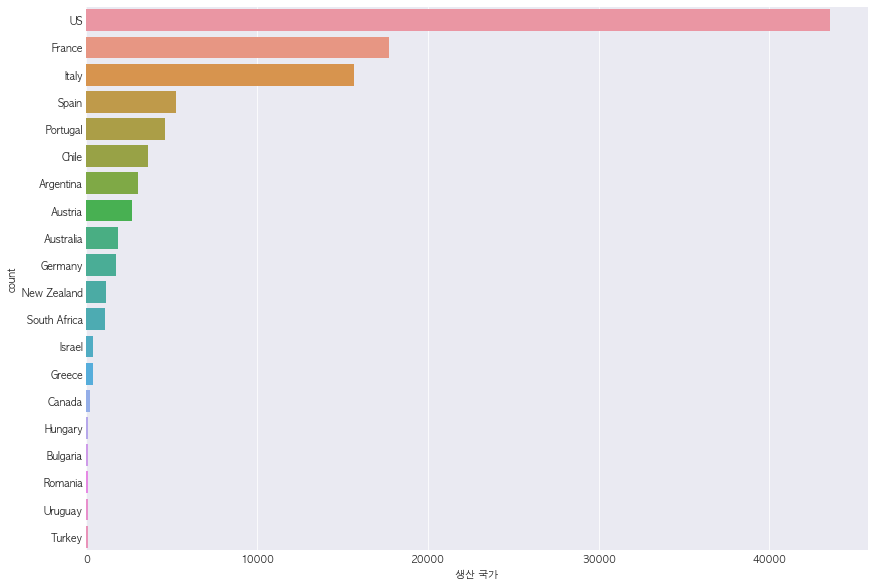

In [10]:
plt.figure(figsize=(14,10))

sns.barplot(x=top20_country['country'], y=top20_country.index, data=top20_country)
plt.xlabel('생산 국가')
plt.ylabel('count')
#plt.title('대여 시작 시간대별 이용 기록 수')
plt.show()

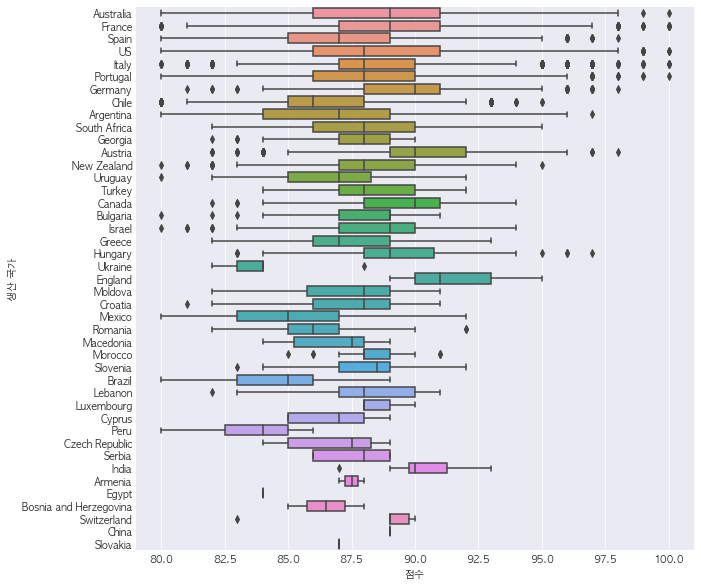

In [11]:
plt.figure(figsize=(10,10))
box = sns.boxplot(x='points', y='country', data=wine)
box.set_ylabel("생산 국가")
box.set_xlabel("점수")
plt.show()

#### taster_name

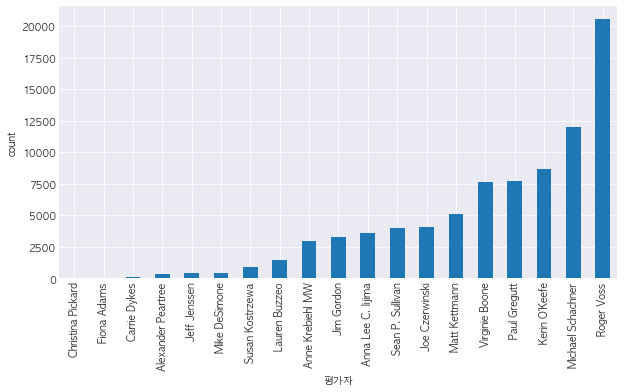

In [12]:
plt.figure(figsize=(10,5))

wine['taster_name'].value_counts(ascending=True).plot(kind='bar') # default=False
plt.xlabel('평가자')
plt.ylabel('count')
#plt.title('대여 시작 시간대별 이용 기록 수')
plt.show() 

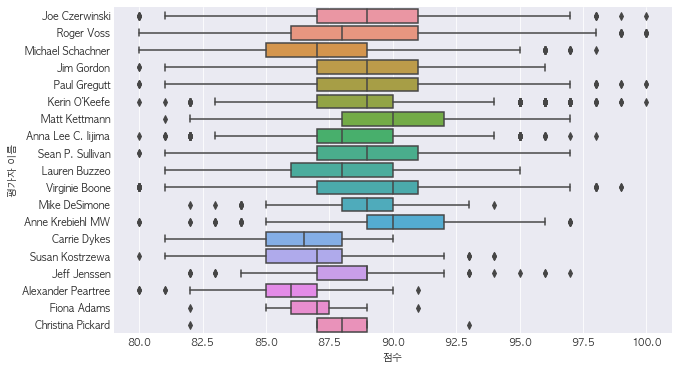

In [44]:
plt.figure(figsize=(10,6))
box = sns.boxplot(x='points', y='taster_name', data=wine)
box.set_ylabel("평가자 이름")
box.set_xlabel("점수")
#plt.savefig('taster_points_bar')
plt.show()

### 평가자들의 평균이 다를까?

#### t-test

In [14]:
from scipy import stats # 통계 모듈 불러오기
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel  # 순서대로 단일표본, 독립표본, 대응표본 t-test
from scipy.stats import probplot             # QQ plot
from scipy.stats import shapiro, levene      # 순서대로 정규성 검정, 등분산 검정 위함

pd.options.display.float_format = '{:.3f}'.format  # 지수 표현 없이 소수 셋째자리까지 출력

In [15]:
wine.taster_name.value_counts()

Roger Voss            20536
Michael Schachner     12026
Kerin O’Keefe          8673
Paul Gregutt           7673
Virginie Boone         7591
Matt Kettmann          5109
Joe Czerwinski         4089
Sean P. Sullivan       3950
Anna Lee C. Iijima     3580
Jim Gordon             3279
Anne Krebiehl MW       2937
Lauren Buzzeo          1428
Susan Kostrzewa         855
Mike DeSimone           425
Jeff Jenssen            394
Alexander Peartree      319
Carrie Dykes            112
Fiona Adams              23
Christina Pickard         6
Name: taster_name, dtype: int64

In [16]:
#Anne = wine.loc[wine['taster_name']== 'Anne Krebiehl MW'].points.mean()
#Anne

In [17]:
points_Matt = wine[wine['taster_name']=='Matt Kettmann'].points
points_Alex = wine[wine['taster_name']=='Alexander Peartree'].points

In [18]:
avg_Matt = points_Matt.mean()
std_Matt = points_Matt.std()

print('Anne 평균:',round(avg_Matt, 3), '/ Anne 표준편차:', round(std_Matt, 3))

avg_Alex = points_Alex.mean()
std_Alex = points_Alex.std()

print('Alex 평균:',round(avg_Alex, 3), '/ Alex 표준편차:', round(std_Alex, 3))

Anne 평균: 90.028 / Anne 표준편차: 2.559
Alex 평균: 85.947 / Alex 표준편차: 1.89


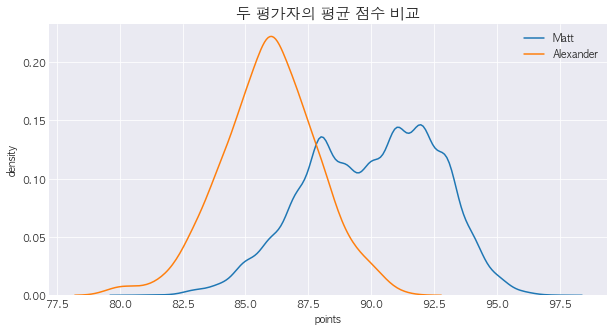

In [19]:
plt.figure(figsize=(10,5))
sns.kdeplot(points_Matt)
sns.kdeplot(points_Alex)
plt.xlabel("points")
plt.ylabel('density')
plt.legend(['Matt','Alexander'])
plt.title('두 평가자의 평균 점수 비교', fontsize=15)
plt.show() 

In [20]:
print("Matt Skewness: %.3f" % points_Matt.skew())  # Skewness: 왜도, 데이터의 비대칭성 정도를 나타냄. 0에 가까울수록 정규분포와 비슷
print("Matt Kurtosis: %.3f" % points_Matt.kurt())

Matt Skewness: -0.245
Matt Kurtosis: -0.580


In [21]:
print("Alexander Skewness: %.3f" % points_Alex.skew())  # Skewness: 왜도, 데이터의 비대칭성 정도를 나타냄. 0에 가까울수록 정규분포와 비슷
print("Alexander Kurtosis: %.3f" % points_Alex.kurt())

Alexander Skewness: -0.229
Alexander Kurtosis: 0.368


In [22]:
#RANDOM_SEED = 42
#np.random.seed(RANDOM_SEED)
#grp_Matt = np.random.choice(points_Matt_cut, 50)
#np.random.seed(RANDOM_SEED+5)
#grp_Alex = np.random.choice(points_Alex_cut, 50)

독립성, 정규성 만족

In [23]:
# 등분산 검정 w/ levene test
# HO: 두 모집단의 분산이 같다.   vs   H1: 두 모집단의 분산이 다르다

#equal_var_pval = levene(grp_Matt, grp_Alex)[1]
#print('등분산 검정의 p-value는',round(equal_var_pval, 3))

등분산 가정 성립

In [24]:
# t-test
#tTestResult = ttest_ind(grp_Matt, grp_Alex)
 
#print("t-statistic: %.3f, p-value : %.3f" % tTestResult)

#### anova

In [25]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [26]:
points_Matt = wine[wine['taster_name']=='Matt Kettmann'].points
points_Anna = wine[wine['taster_name'] == 'Anna Lee C. Iijima'].points
points_Alex = wine[wine['taster_name']=='Alexander Peartree'].points

In [27]:
avg_Matt = points_Matt.mean()
std_Matt = points_Matt.std()

print('Matt 평균:',round(avg_Matt, 3), '/ Matt 표준편차:', round(std_Matt, 3))

avg_Anna = points_Anna.mean()
std_Anna = points_Anna.std()

print('Anna 평균:',round(avg_Anna, 3), '/ Anna 표준편차:', round(std_Anna, 3))

avg_Alex = points_Alex.mean()
std_Alex = points_Alex.std()

print('Alex 평균:',round(avg_Alex, 3), '/ Alex 표준편차:', round(std_Alex, 3))

Matt 평균: 90.028 / Matt 표준편차: 2.559
Anna 평균: 88.404 / Anna 표준편차: 2.551
Alex 평균: 85.947 / Alex 표준편차: 1.89


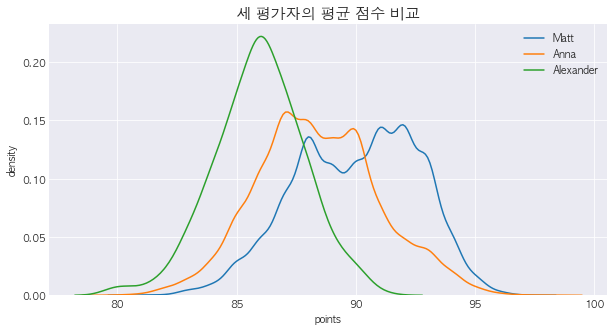

In [74]:
plt.figure(figsize=(10,5))
sns.kdeplot(points_Matt)
sns.kdeplot(points_Anna)
sns.kdeplot(points_Alex)
plt.xlabel("points")
plt.ylabel('density')
plt.legend(['Matt','Anna','Alexander'])
plt.title('세 평가자의 평균 점수 비교', fontsize=15)
#plt.savefig('anova')
plt.show() 

In [29]:
print("Matt Skewness: %.3f" % points_Matt.skew())  # Skewness: 왜도, 데이터의 비대칭성 정도를 나타냄. 0에 가까울수록 정규분포와 비슷
print("Matt Kurtosis: %.3f" % points_Matt.kurt())

print("Anna Skewness: %.3f" % points_Anna.skew())  # Skewness: 왜도, 데이터의 비대칭성 정도를 나타냄. 0에 가까울수록 정규분포와 비슷
print("Anna Kurtosis: %.3f" % points_Anna.kurt())

print("Alex Skewness: %.3f" % points_Alex.skew())  # Skewness: 왜도, 데이터의 비대칭성 정도를 나타냄. 0에 가까울수록 정규분포와 비슷
print("Alex Kurtosis: %.3f" % points_Alex.kurt())

Matt Skewness: -0.245
Matt Kurtosis: -0.580
Anna Skewness: 0.177
Anna Kurtosis: -0.067
Alex Skewness: -0.229
Alex Kurtosis: 0.368


In [30]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
grp_Matt = np.random.choice(points_Matt, 50)
np.random.seed(RANDOM_SEED+5)
grp_Anna = np.random.choice(points_Anna, 50)
np.random.seed(RANDOM_SEED+10)
grp_Alex = np.random.choice(points_Alex, 50)

In [31]:
equal_var_pval = levene(grp_Matt, grp_Anna, grp_Alex)[1]
print('등분산 검정의 p-value는',round(equal_var_pval, 3))

등분산 검정의 p-value는 0.012


In [32]:
df_Matt = pd.DataFrame(grp_Matt).rename(columns={0:'points'})
df_Matt['taster_name'] = 'Matt Kettmann'
df_Anna = pd.DataFrame(grp_Anna).rename(columns={0:'points'})
df_Anna['taster_name'] = 'Anna Lee C. Iijima'
df_Alex = pd.DataFrame(grp_Alex).rename(columns={0:'points'})
df_Alex['taster_name'] = 'Alexander Peartree'

data = pd.concat([df_Matt, df_Anna, df_Alex])
data.head()

,points,taster_name
0,93,Matt Kettmann
1,88,Matt Kettmann
2,89,Matt Kettmann
3,92,Matt Kettmann
4,92,Matt Kettmann


In [37]:
import pingouin as pg
pg.welch_anova(dv='points', between='taster_name', data=data)

ModuleNotFoundError: No module named 'pingouin'

### variety

In [ ]:
variety_points = wine[['variety', 'points']]

In [ ]:
#Top20 variety
top20_variety = variety_points['variety'].value_counts().to_frame()[0:20]
#top20_variety

In [ ]:
plt.figure(figsize=(14,10))

sns.barplot(x=top20_variety['variety'], y=top20_variety.index, data=top20_variety)
plt.xlabel('포도 품종')
plt.ylabel('count')
#plt.title('대여 시작 시간대별 이용 기록 수')
plt.show()

In [ ]:
'''plt.figure(figsize=(10,6))
box = sns.boxplot(x='points', y='variety', data=top20_variety)
box.set_ylabel("포도 품종")
box.set_xlabel("점수")
plt.show()'''

### description - sentiment analysis

In [45]:
import nltk
from nltk import word_tokenize
import re
from collections import Counter
from nltk.corpus import stopwords

#nltk.download('stopwords')

In [46]:
#Making the "description" column a list
list_description=[]
for i in range(len(wine['description'])):
    list_description.append(wine['description'][i])

In [47]:
#Removing numbers
def remove(list):
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list]
    return list

list_description_1 = remove(list_description)

In [48]:
#Making everything lowercase
list_description_2=[x.lower() for x in list_description_1] 

In [49]:
#Removing stop words
stopWords = set(stopwords.words('english'))
def remove_stopwords(data):
    output_array=[]
    for sentence in data:
        temp_list=[]
        for word in sentence.split():
            if word not in stopWords:
                temp_list.append(word)
        output_array.append(' '.join(temp_list))
    return output_array

list_description_3=remove_stopwords(list_description_2)

In [50]:
#Tokenizing the list and removing punctuation
tokenizer = nltk.RegexpTokenizer(r"\w+")
list_token=[]
for i in range(len(wine['description'])):
    list_token.append(tokenizer.tokenize(str(list_description_3[i])))

In [51]:
#remove stopwords that were "hidden" in punctuation
list_token2=[]
for i in range(len(list_token)):
    test=[]
    for j in list_token[i]:
        if j not in stopWords:
            test.append(j)
    list_token2.append(test)

In [52]:
#removing duplicates within the same sublist
list_tokens = []
for i in range(len(list_token2)):
    a=[]
    for elem in list_token2[i]:
        if elem not in a:
            a.append(elem)
    list_tokens.append(a)

In [53]:
#Adding the tokens column to the wine
wine['tokens']=list_tokens

In [54]:
wine['tokens'].head()

0    [possibly, little, sweet, soft, easygoing, cha...
1    [soft, almost, dry, wine, full, mouth, caramel...
2    [generic, white, fruit, aromas, peach, apple, ...
3    [winery, best, nebula, years, still, little, s...
4    [rich, pinot, whose, primary, virtue, fruit, e...
Name: tokens, dtype: object

In [55]:
# labMt_dict
labMt = pd.read_csv('Hedonometer.csv')
labMt_dict = dict([(labMt['Word'][i], labMt['Happiness Score'][i]) for i in labMt.index])

In [56]:
d_score = []
for tokens in wine['tokens']:
    score = 0
    for token in tokens:
        score += labMt_dict.get(str(token),0)
    d_score.append(score)

In [57]:
d_score

[42.22,
 77.64,
 71.91000000000001,
 107.22000000000001,
 89.65,
 76.34000000000002,
 115.91999999999999,
 60.88000000000001,
 40.980000000000004,
 110.29999999999997,
 71.02000000000001,
 64.39,
 78.8,
 92.12,
 100.92000000000002,
 143.87,
 91.6,
 111.06000000000002,
 68.55,
 73.92,
 79.0,
 104.69999999999999,
 62.38,
 149.96,
 56.540000000000006,
 116.52,
 61.14000000000001,
 66.22,
 85.78,
 49.980000000000004,
 111.27,
 156.76,
 47.0,
 87.33999999999999,
 66.43,
 53.10999999999999,
 69.86,
 116.16000000000001,
 172.63999999999996,
 107.49,
 74.87,
 141.35999999999999,
 63.65,
 125.54000000000002,
 134.99,
 140.22,
 108.58000000000001,
 114.67,
 95.42,
 40.42,
 139.58,
 87.40999999999998,
 101.57000000000001,
 93.11000000000001,
 79.56,
 76.9,
 146.30000000000004,
 77.72,
 85.96,
 101.39,
 63.38999999999999,
 61.88999999999999,
 182.67999999999992,
 38.45,
 62.959999999999994,
 68.10000000000001,
 163.97000000000003,
 102.89999999999999,
 78.35,
 80.9,
 83.73,
 99.9,
 111.94999999999

In [58]:
wine['description_score'] = d_score

In [59]:
# same with test set
test = pd.read_csv('test.csv')

#Making the "description" column a list
list_description_t=[]
for i in range(len(test['description'])):
    list_description_t.append(test['description'][i])

#Removing numbers
def remove(list):
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list]
    return list

list_description_t1 = remove(list_description_t)

#Making everything lowercase
list_description_t2=[x.lower() for x in list_description_t1] 

#Removing stop words
stopWords = set(stopwords.words('english'))
def remove_stopwords(data):
    output_array=[]
    for sentence in data:
        temp_list=[]
        for word in sentence.split():
            if word not in stopWords:
                temp_list.append(word)
        output_array.append(' '.join(temp_list))
    return output_array

list_description_t3=remove_stopwords(list_description_t2)

#Tokenizing the list and removing punctuation
tokenizer = nltk.RegexpTokenizer(r"\w+")
list_token_t=[]
for i in range(len(test['description'])):
    list_token_t.append(tokenizer.tokenize(str(list_description_t3[i])))
    
#remove stopwords that were "hidden" in punctuation
list_token_t2=[]
for i in range(len(list_token_t)):
    list_t=[]
    for j in list_token_t[i]:
        if j not in stopWords:
            list_t.append(j)
    list_token_t2.append(test)

#removing duplicates within the same sublist
list_tokens_t = []
for i in range(len(list_token_t2)):
    a=[]
    for elem in list_token_t2[i]:
        if elem not in a:
            a.append(elem)
    list_tokens_t.append(a)
    
#Adding the tokens column to the wine
test['tokens']=list_tokens_t

#scoring
d_score_t = []
for tokens in test['tokens']:
    score = 0
    for token in tokens:
        score += labMt_dict.get(str(token),0)
    d_score_t.append(score)
    
test['description_score'] = d_score_t

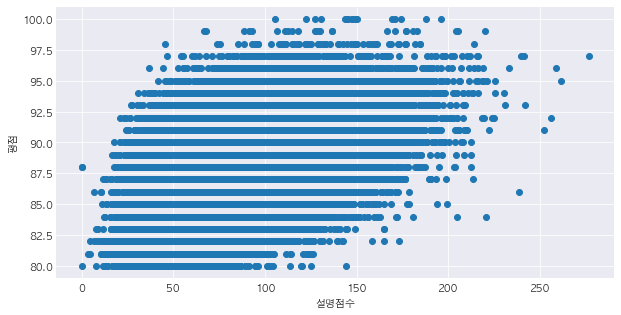

In [60]:
plt.figure(figsize=(10,5))
plt.scatter(data=wine, x='description_score', y='points')
#plt.plot(wine.groupby('points')['description_score'].mean(), marker='o', c='r')
plt.xlabel('설명점수') # x축 제목
plt.ylabel('평점') # y축 제목
plt.show()

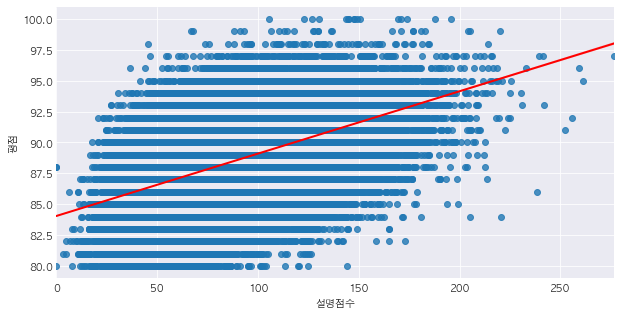

In [69]:
plt.figure(figsize=(10,5))
sns.regplot(data=wine, x='description_score', y='points', 
            line_kws={"color":"red", "lw":2}) # line 색깔, 두께 지정
plt.xlabel('설명점수') 
plt.ylabel('평점') 
#plt.savefig('dscore_points_regplot')
plt.show()

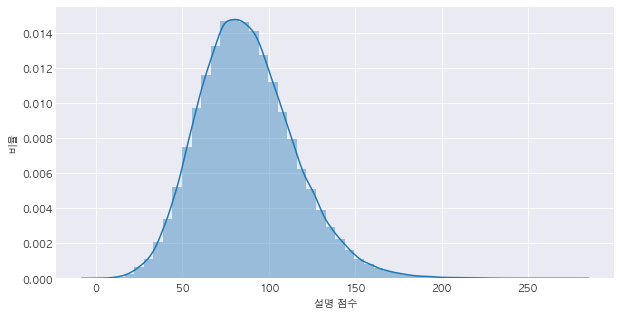

In [73]:
plt.figure(figsize=(10,5))

dist = sns.distplot(wine['description_score']) 
dist.set_xlabel("설명 점수")
dist.set_ylabel("비율")
#plt.savefig('dscore_points_distplot')
plt.show()

In [62]:
print("Skewness: %f" % wine['description_score'].skew()) # 왜도
print("Kurtosis: %f" % wine['description_score'].kurt()) # 첨도

Skewness: 0.504307
Kurtosis: 0.592333


In [63]:
dscore_points = wine[['description_score','points']]
dscore_points.corr()

,description_score,points
description_score,1.000,0.459
points,0.459,1.000


### year

In [65]:
import re
year_list = []    
for i in wine['title']:
    year = re.search(r'19\d{2}|20\d{2}', i)
    if year:
        year_list.append(year.group())
    else: 
      year_list.append(None)

In [66]:
wine['year'] = year_list


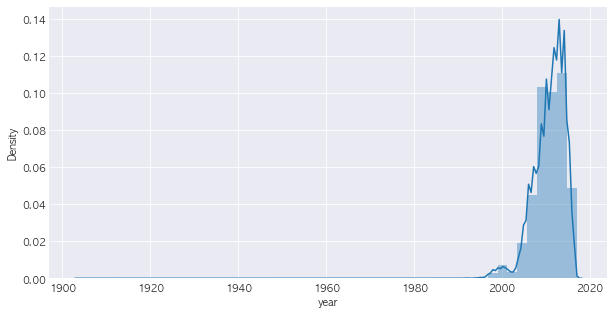

In [72]:
plt.figure(figsize=(10,5))

dist2 = sns.distplot(wine['year']) 
dist.set_xlabel("연도")
dist.set_ylabel("비율")
plt.show()

## 모델링

In [ ]:
wine.head()

In [ ]:
X = wine.copy()
y = X['points']
X.drop(['points'], axis=1, inplace=True)

In [ ]:
#X = X[feature_columns]

In [ ]:
#결측치 처리
#X['taster_name'] = X['taster_name'].fillna('None')



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
feature_columns = ['price', 'province', 'taster_name', 'variety','description_score']

In [ ]:
X_train = X_train[feature_columns]
X_valid = X_valid[feature_columns]
X_test = test.copy()
X_test = X_test[feature_columns]

In [ ]:
feature_columns_categorical = ['province', 'taster_name', 'variety']

# categorical field의 NaN 값을 모두 'None'이라는 string으로 바꿔줍니다.
X_train[feature_columns_categorical] = X_train[feature_columns_categorical].fillna('None')
X_valid[feature_columns_categorical] = X_valid[feature_columns_categorical].fillna('None')
X_test[feature_columns_categorical] = X_test[feature_columns_categorical].fillna('None')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['province', 'taster_name', 'variety']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

#print(len(X_train['province'].unique())) # 404 unique provinces
#print(len(X_train['taster_name'].unique())) # 20 unique taster_name
#print(len(X_train['variety'].unique())) # 659 unique variety

# therefore one OH coded array would be 1083(404+20+659) bits long

# fit and transform X_train.
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[categorical_columns]))
#print(OH_cols_train)
# only transform X_valid into OneHot form, as col size(1083) is already fitted above
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[categorical_columns]))
#print(OH_cols_valid)

# 새로운 DataFrame이 만들어지며 기존 index를 없애버렸으므로 index를 다시 만들어줍니다.
# keep track of index in original data
OH_cols_train.index = X_train.index
#print(OH_cols_train.index)
OH_cols_valid.index = X_valid.index

# 새로운 DataFrame이 만들어지며 기존 column names를 없애버렸으므로 column names를 다시 만들어줍니다. 이 과정은 필수적이진 않습니다.
OH_cols_train.columns = OH_encoder.get_feature_names(['province', 'taster_name', 'variety'])
OH_cols_valid.columns = OH_encoder.get_feature_names(['province', 'taster_name', 'variety'])
#print(OH_cols_train)

# One Hot Encoder fit & transform 이후에 province는 [0,0,0,...,0] 404 길이의 array로 변환, 다른 col도 마찬가지

In [ ]:
# numerical variable(여기서는 price)의 빠진 값을 적당한 값으로 채워줍니다. 여기서는 training set에서의 평균값으로 빠진 값을 채웁니다.
from sklearn.impute import SimpleImputer

# drop categorical_columns to only leave price
num_X_train = X_train.drop(categorical_columns, axis=1)
num_X_valid = X_valid.drop(categorical_columns, axis=1)

# what is the mean of existing price data?
# print(num_X_train['price'].mean(skipna=True))   # 35.423

my_imputer = SimpleImputer(strategy='mean')
imputed_num_X_train = pd.DataFrame(my_imputer.fit_transform(num_X_train))
imputed_num_X_valid = pd.DataFrame(my_imputer.transform(num_X_valid))

# 새로운 DataFrame이 만들어지며 기존 index를 없애버렸으므로 index를 다시 만들어줍니다.
imputed_num_X_train.index = num_X_train.index
imputed_num_X_valid.index = num_X_valid.index

# 새로운 DataFrame이 만들어지며 기존 column names를 없애버렸으므로 column names를 다시 만들어줍니다. 이 과정은 필수적이진 않습니다.
imputed_num_X_train.columns = num_X_train.columns
imputed_num_X_valid.columns = num_X_valid.columns

In [ ]:
preprocessed_X_train = pd.concat([imputed_num_X_train, OH_cols_train], axis=1)
preprocessed_X_valid = pd.concat([imputed_num_X_valid, OH_cols_valid], axis=1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor(random_state=1, max_depth=20)
model.fit(preprocessed_X_train, y_train)
valid_preds = model.predict(preprocessed_X_valid)
print('RMSE: {}'.format(mean_squared_error(y_valid, valid_preds, squared=False)))

In [ ]:
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[categorical_columns]))
OH_cols_test.index = X_test.index
num_X_test = X_test.drop(categorical_columns, axis=1)
imputed_num_X_test = pd.DataFrame(my_imputer.transform(num_X_test))
imputed_num_X_test.index = num_X_test.index

preprocessed_X_test = pd.concat([imputed_num_X_test, OH_cols_test], axis=1)
test_preds = model.predict(preprocessed_X_test)